# TP0: Introducción a Python para DSP

Este trabajo práctico tiene como objetivo familiarizarte con la generación y análisis básico de señales usando **Python puro**, **NumPy** y **SciPy**.

## Objetivos
1. Definir funciones para generar señales básicas en Python puro (sin bibliotecas externas).
2. Generar señales usando bibliotecas como **NumPy** y **SciPy**.
3. Comprender la diferencia entre listas y arrays, y el beneficio del vectorizado.
4. Practicar operaciones básicas: encontrar máximos y mínimos en señales.


## Ejercicio 1: Señal cuadrada en Python puro

**Tarea:** Crea una función que genere una señal cuadrada de longitud `N` con los primeros `k` valores en `0` y los siguientes `k` en `1`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la señal como una lista.
- Muestra la lista y grafícala usando `matplotlib`.


[0, 0, 0, 0, 0, 1, 1, 1, 1, 1]


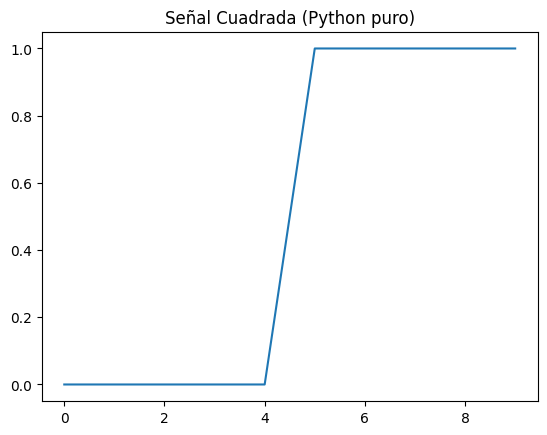

In [5]:
import matplotlib.pyplot as plt

def generar_senal_cuadrada(N, k):
    senial = []
    for i in range(k):
        senial.append(0)
    for i in range(k):
        senial.append(1)
    return senial

senal_cuad = generar_senal_cuadrada(10, 5)
print(senal_cuad)
plt.title('Señal Cuadrada (Python puro)')
plt.plot(senal_cuad)
plt.show()

## Ejercicio 2: Señal triangular en Python puro

**Tarea:** Crea una función que genere una señal triangular que suba desde `0` hasta `M` y luego baje a `0`.

**Indicaciones:**
- Usa bucles `for`.
- Devuelve la lista y grafícala.


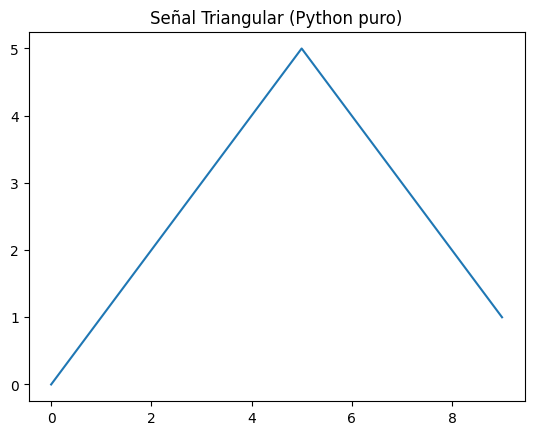

In [3]:
def generar_senal_triangular(M):
    senial = []
    for i in range(M):
        senial.append(i)
    for i in range(M, 0, -1):
        senial.append(i)
    return senial

senal_tria = generar_senal_triangular(5)
plt.title('Señal Triangular (Python puro)')
plt.plot(senal_tria)
plt.show()

## Ejercicio 3: Delta de Dirac en Python puro

**Tarea:** Implementa la función `generar_delta_dirac(longitud, posicion)` que devuelve una lista de ceros con un único `1` en la posición indicada.

**Prueba la función** para `longitud = 10` y `posición = 5`.


In [4]:
def generar_delta_dirac(cantidad, pos):
    if pos >= cantidad:
        return 'Error: posición fuera de rango'
    delta = [0]*cantidad
    delta[pos] = 1
    return delta

print(generar_delta_dirac(10,5))

[0, 0, 0, 0, 0, 1, 0, 0, 0, 0]


## Ejercicio 4: Generación con NumPy/SciPy

Repite los ejercicios anteriores usando **NumPy/SciPy** y grafíca las señales junto con su **base de tiempo** (`t`) generada con `np.linspace()` o `np.arange()`.

**Pregunta:** ¿Cuál es la diferencia entre usar `linspace` y `arange`?

**Pistas:**
- Señal cuadrada: `sig.square()`.
- Señal senoidal: `np.sin()`.
- Señal triangular: `sig.sawtooth()`
- Señal delta de dirac: `np.dirac()` (o `np.concatenate()` con `zeros` y `ones`).


In [3]:
# ¿Cuál es la diferencia entre usar linspace y arange?
# Ambos generan una secuecnia de números, la difrencia es que el arange genera esa secuencia de a saltos de valores fijos donde se le entrega paramateros de inicio y final numpy.arange(start, stop, step)
# Y el lindspace genera esa secuencia dividiendo uniformemente la cantidad de numeros que se asignan y no por pasos

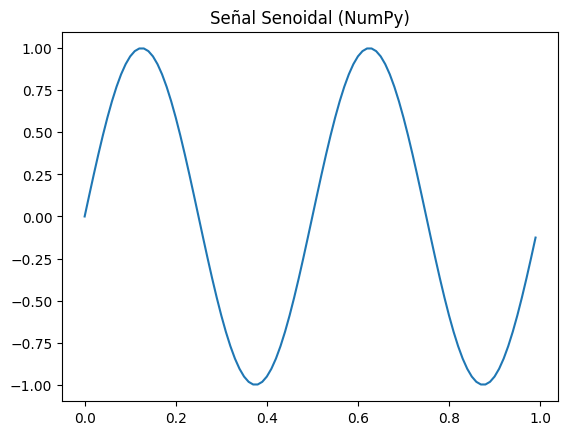

In [15]:
import numpy as np

# Señal senoidal con NumPy
frec = 2
f_muestreo = 100
t = np.arange(0, 1, 1/f_muestreo)
senal_seno = np.sin(2 * np.pi * frec * t)
plt.title('Señal Senoidal (NumPy)')
plt.plot(t, senal_seno)
plt.show()

## Señal Delta de Dirac


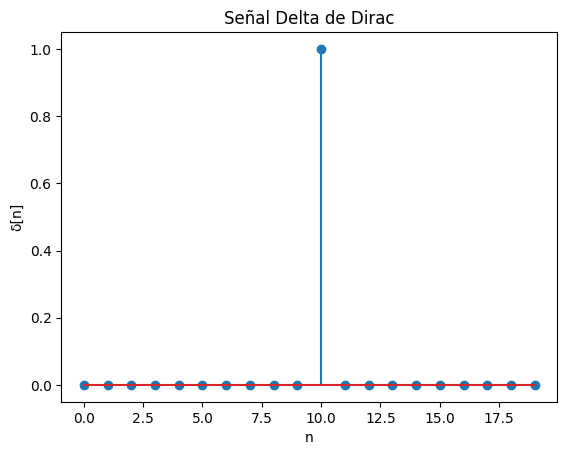

In [21]:
import numpy as np
import matplotlib.pyplot as plt

N = 20  
n0 = 10  # Aca pongo la posicion dle impulso
dirac = np.concatenate([np.zeros(n0), [1], np.zeros(N - n0 - 1)])
n = np.arange(N)

# Graficar
plt.stem(n, dirac) 
plt.title('Señal Delta de Dirac')
plt.xlabel("n")
plt.ylabel("δ[n]")
plt.show()

## Señal Triangular


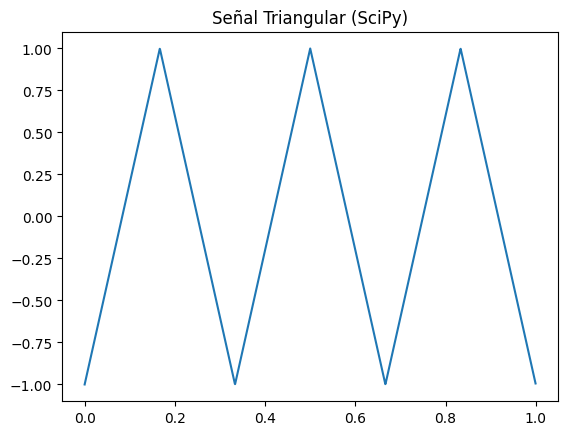

In [14]:
import scipy.signal as sig

# Señal Triangular con Scipy
frec = 3
f_muestreo = 2000
t = np.arange(0, 1, 1/f_muestreo)
sen_triangular = sig.sawtooth(t*np.pi*2*frec, width=0.5)
plt.title('Señal Triangular (SciPy)')
plt.plot(t, sen_triangular)
plt.show()

## Ejemplo: Señal cuadrada con `scipy.signal`


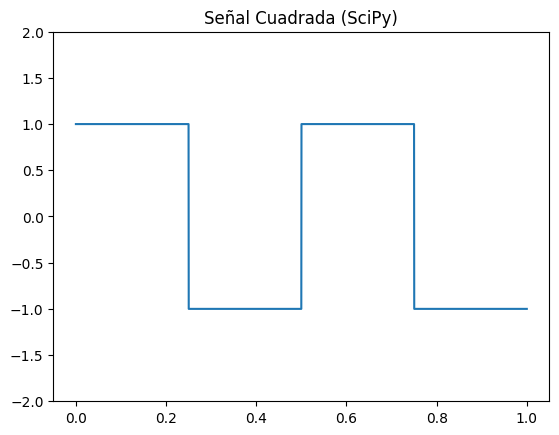

In [7]:
import scipy.signal as sig

frec_muestreo = 5000
frec_senial = 2
t = np.arange(0,1,1/frec_muestreo)
senal_cuadrada_scipy = sig.square(2 * np.pi * frec_senial * t)

plt.title('Señal Cuadrada (SciPy)')
plt.plot(t, senal_cuadrada_scipy)
plt.ylim(-2, 2)
plt.show()

## Ejercicio 6: Máximos y mínimos

Encuentra el valor máximo y mínimo de una señal y sus posiciones:

- Primero con Python puro (listas y bucles).
- Luego con NumPy (`np.max`, `np.min`, `np.argmax`, `np.argmin`).


In [5]:
# Sin NumPy
signal = [3, 7, 1, 9, 4, 2, 8]

# primero inicializo las variables
max_val = signal[0]
min_val = signal[0]
max_pos = 0
min_pos = 0

for i in range(len(signal)):
    if signal[i] > max_val:
        max_val = signal[i]
        max_pos = i
    if signal[i] < min_val:
        min_val = signal[i]
        min_pos = i

print("Python puro:")
print("Máximo:", max_val, "en posición", max_pos)
print("Mínimo:", min_val, "en posición", min_pos)

# Con NumPy

import numpy as np

signal = np.array([3, 7, 1, 9, 4, 2, 8])

max_val = np.max(signal)
min_val = np.min(signal)
max_pos = np.argmax(signal)  # índice del máximo
min_pos = np.argmin(signal)  # índice del mínimo

print("Con NumPy:")
print("Máximo:", max_val, "en posición", max_pos)
print("Mínimo:", min_val, "en posición", min_pos)


Python puro:
Máximo: 9 en posición 3
Mínimo: 1 en posición 2
Con NumPy:
Máximo: 9 en posición 3
Mínimo: 1 en posición 2
